In [1]:
from astroquery.hips2fits import hips2fits
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap
from astropy import wcs
from astropy.io import fits
import aplpy

INFO: Auto-setting vmin to -1.064e+01 [aplpy.core]
INFO: Auto-setting vmax to  9.164e+01 [aplpy.core]


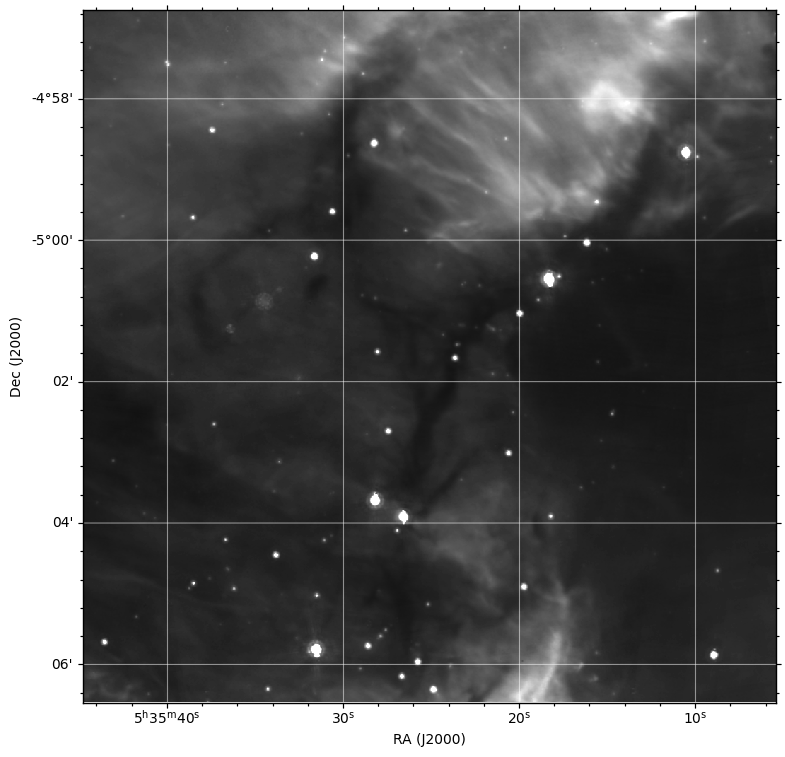

In [2]:
fig = aplpy.FITSFigure('omc3-spitzer.fits')
fig.show_grayscale()
fig.add_grid()


In [3]:
# extract WCS object from local FITS file
hdu = fits.open('omc3-spitzer.fits')
spitzer_data = hdu[0].data
spitzer_wcs = wcs.WCS(hdu[0].header)

spitzer_wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.85458307736504  -5.027305555555555  
CRPIX : 490.5  490.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00016666666628523  0.000166666666285236  
NAXIS : 980  980

In [4]:
# retrieve AllWISE W4 cutout from HiPS2FITS
hips = 'CDS/P/allWISE/W4'
allwise_fits = hips2fits.query_with_wcs(
   hips=hips,
   wcs=spitzer_wcs,
   get_query_payload=False,
   format='fits'
)


In [5]:
# check result type
allwise_fits

INFO: Auto-setting vmin to  8.685e+01 [aplpy.core]
INFO: Auto-setting vmax to  3.998e+02 [aplpy.core]


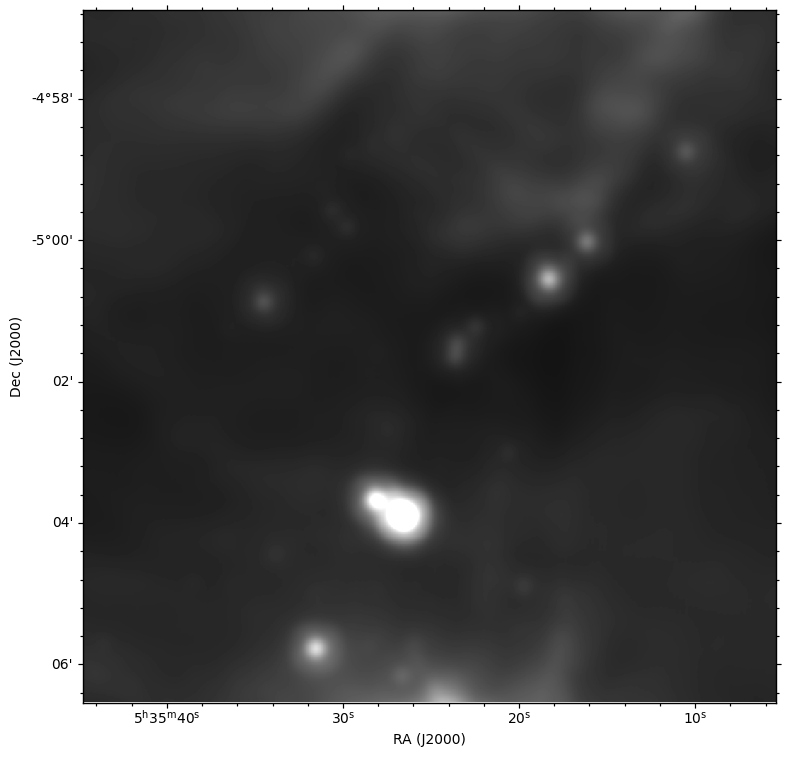

In [6]:
# Display generated cutout
fig = aplpy.FITSFigure(allwise_fits)

fig.show_grayscale()

In [7]:
allwise_fits.writeto('omc3-allwise.fits', overwrite=True)

In [8]:
# retrieve MSX C cutout from HiPS2FITS
hips = 'CDS/P/MSX/C'
msx_fits = hips2fits.query_with_wcs(
   hips=hips,
   wcs=spitzer_wcs,
   get_query_payload=False,
   format='fits'
)
msx_fits.writeto('omc3-MSX.fits', overwrite=True)

In [9]:
# retrieve AKARI FIS WideS cutout from HiPS2FITS
hips = 'CDS/P/AKARI/FIS/WideS'
akari_fits = hips2fits.query_with_wcs(
   hips=hips,
   wcs=spitzer_wcs,
   get_query_payload=False,
   format='fits'
)
akari_fits.writeto('omc3-AKARI.fits', overwrite=True)


INFO: Auto-setting vmin to -1.059e+01 [aplpy.core]
INFO: Auto-setting vmax to  9.251e+01 [aplpy.core]
INFO: Auto-setting vmin to  8.201e+01 [aplpy.core]
INFO: Auto-setting vmax to  4.544e+02 [aplpy.core]
INFO: Auto-setting vmin to -3.616e-07 [aplpy.core]
INFO: Auto-setting vmax to  5.883e-06 [aplpy.core]
INFO: Auto-setting vmin to -1.120e+02 [aplpy.core]
INFO: Auto-setting vmax to  5.956e+03 [aplpy.core]


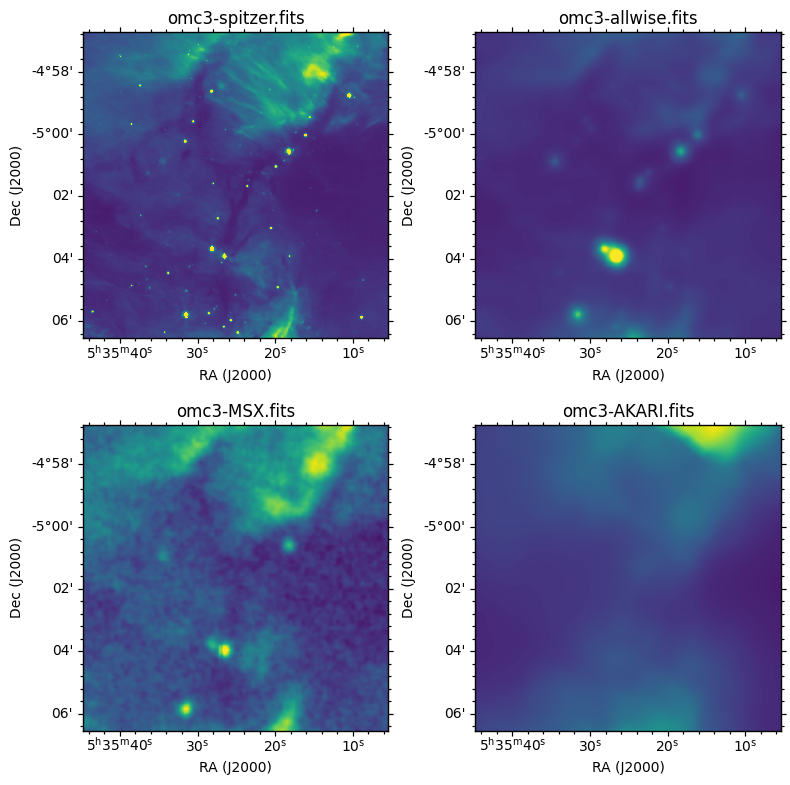

In [10]:
# Display original FITS image + 3 HiPS2FITS cutouts

fits_files = ['omc3-spitzer.fits', 'omc3-allwise.fits', 'omc3-MSX.fits', 'omc3-AKARI.fits']

# remove axes from sub-plots
rc = {"axes.spines.left" : False,
      "axes.spines.right" : False,
      "axes.spines.bottom" : False,
      "axes.spines.top" : False,
      "xtick.bottom" : False,
      "xtick.labelbottom" : False,
      "ytick.labelleft" : False,
      "ytick.left" : False}
plt.rcParams.update(rc)

# 2x2 subplot matrix
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

# loop over FITS images list and display each of them
for i, fits_file in enumerate(fits_files):

    f = aplpy.FITSFigure(fits_file, figure=fig, subplot=(2, 2, i + 1))

    f.show_colorscale(cmap='viridis')

    f.set_title(f'{fits_file}')
    
    
# Adjust layout and show the plot
plt.tight_layout()
plt.show()